Adding keep-alive script to prevent Colab disconnection...


<IPython.core.display.Javascript object>

Please upload kaggle.json from C:\Users\ippae\.kaggle\kaggle.json


Görüntülenen çıkış son 5000 satıra kısaltıldı.
deepweeds_kaggle/images/20170727-113546-1.jpg
deepweeds_kaggle/images/20171219-105602-2.jpg
deepweeds_kaggle/images/20171218-120734-2.jpg
deepweeds_kaggle/images/20170920-192007-1.jpg
deepweeds_kaggle/images/20180119-115622-2.jpg
deepweeds_kaggle/images/20170920-190229-1.jpg
deepweeds_kaggle/images/20170920-100839-3.jpg
deepweeds_kaggle/images/20171220-095237-1.jpg
deepweeds_kaggle/images/20170315-085800-0.jpg
deepweeds_kaggle/images/20171025-075747-2.jpg
deepweeds_kaggle/images/20180105-093654-2.jpg
deepweeds_kaggle/images/20180125-091650-2.jpg
deepweeds_kaggle/images/20170714-120357-2.jpg
deepweeds_kaggle/images/20180119-105930-1.jpg
deepweeds_kaggle/images/20180125-094030-1.jpg
deepweeds_kaggle/images/20180109-105749-2.jpg
deepweeds_kaggle/images/20170127-102955-0.jpg
deepweeds_kaggle/images/20170627-105033-0.jpg
deepweeds_kaggle/images/20171109-085929-1.jpg
deepweeds_kaggle/images/20171113-093432-1.jpg
deepweeds_kaggle/images/20170210-

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


Suggested learning rates: min=1.20e-02, steep=6.31e-03


epoch,train_loss,valid_loss,error_rate,accuracy,precision_multiclass,recall_multiclass,time
0,1.095393,0.765133,0.263925,0.736075,0.628490,0.691501,02:12
1,0.647827,0.433153,0.156241,0.843759,0.807103,0.764068,02:13
2,0.503742,0.364272,0.130249,0.869752,0.836739,0.820978,02:09


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,error_rate,accuracy,precision_multiclass,recall_multiclass,time
0,0.439786,0.308063,0.106827,0.893173,0.870678,0.854848,02:09
1,0.336049,0.247714,0.085690,0.914310,0.895486,0.891563,02:11
2,0.288153,0.233755,0.082548,0.917452,0.904933,0.887658,02:15


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


Model training complete and saved as 'invasive_weed_multiclass_classifier.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

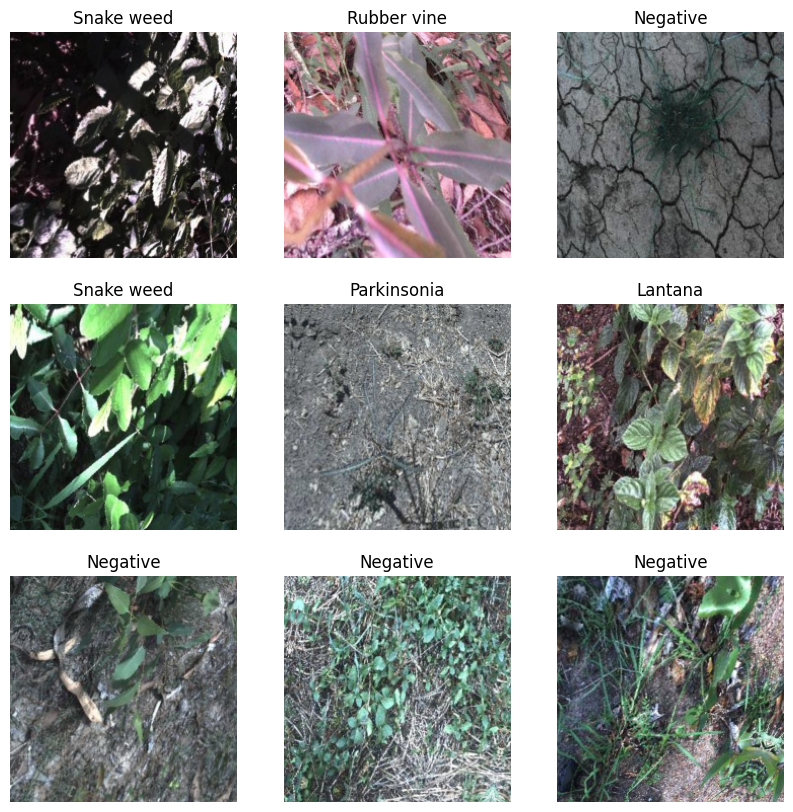

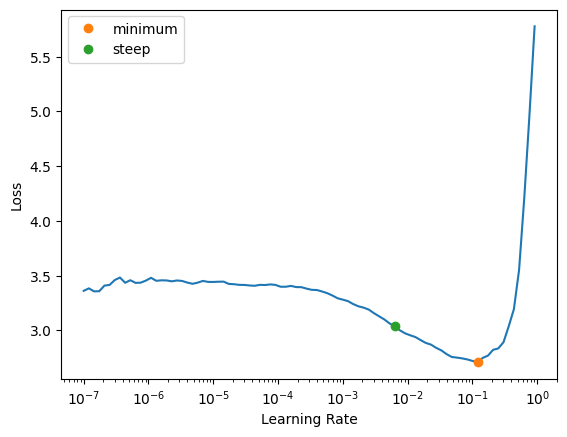

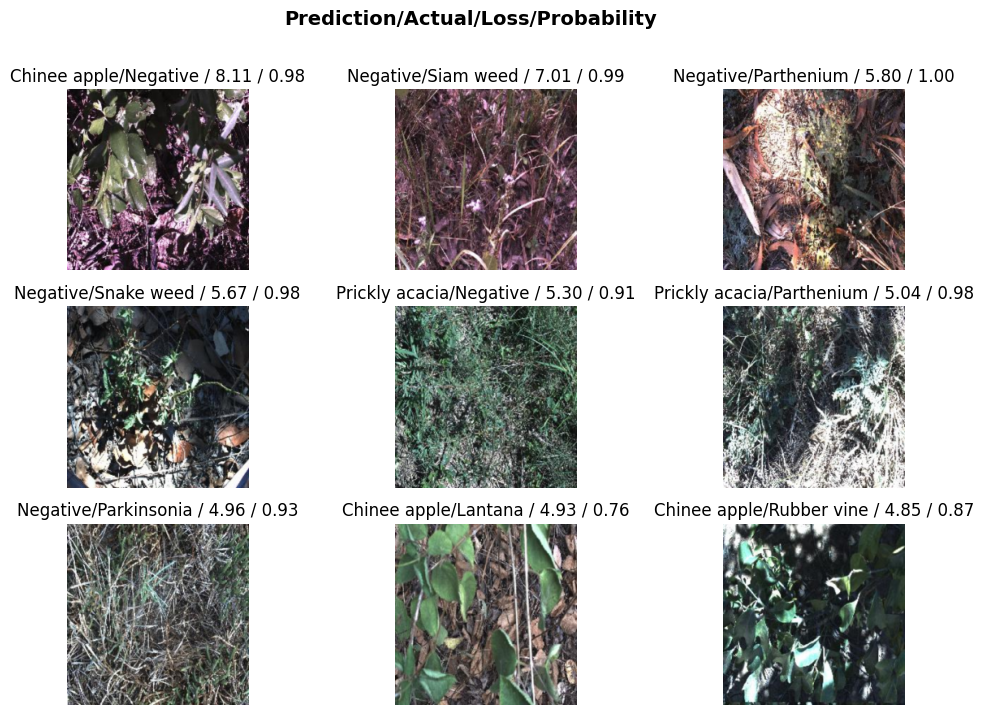

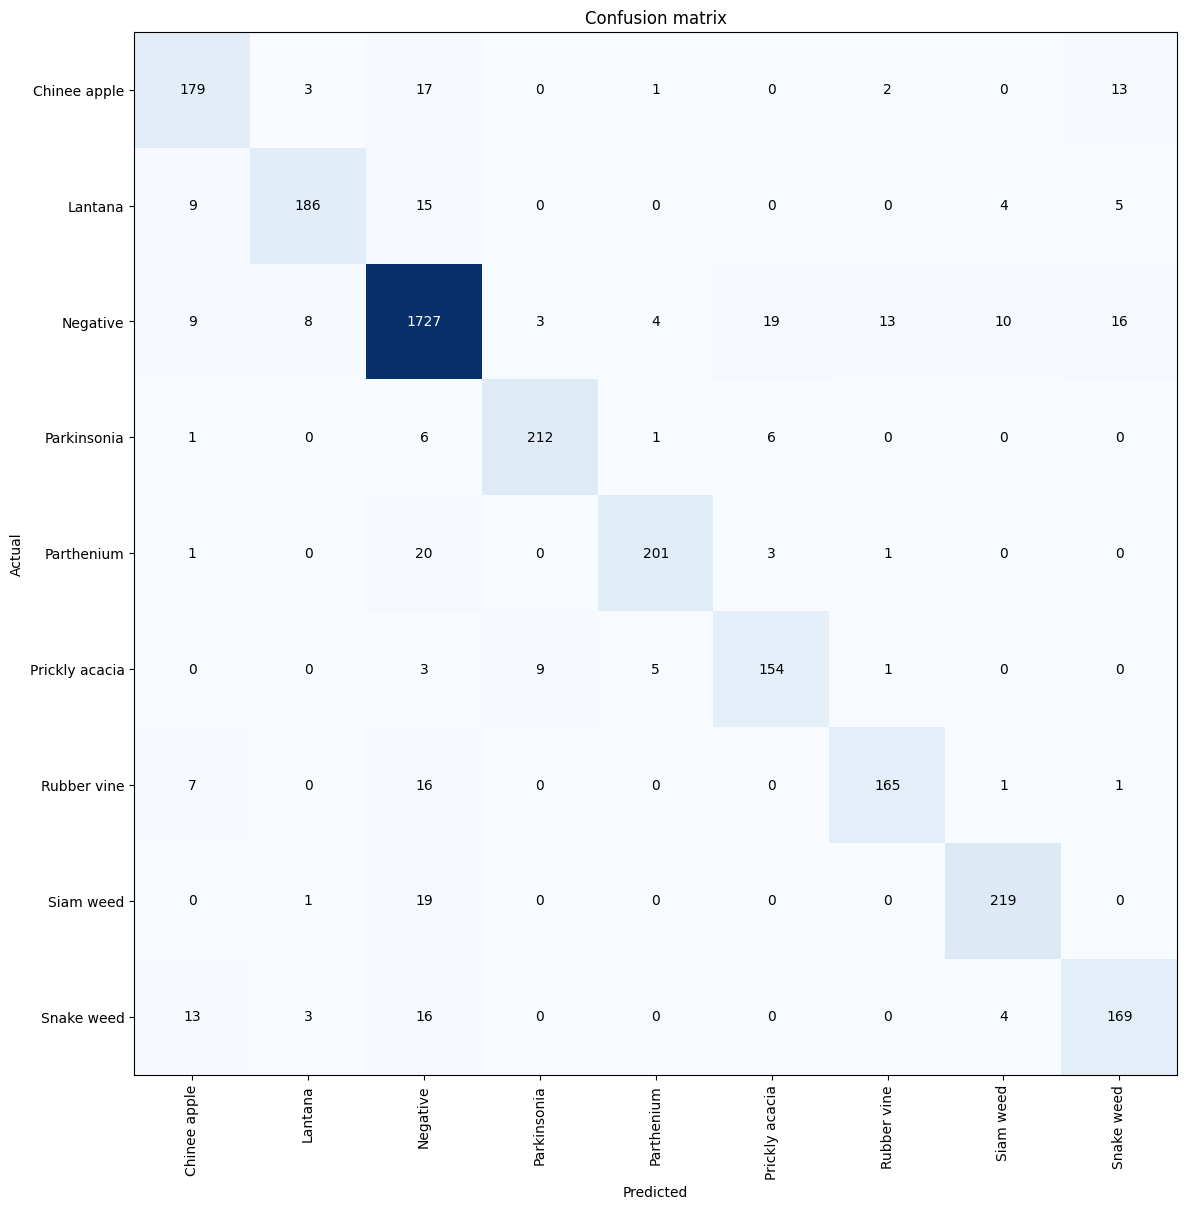

In [ ]:
from fastai.vision.all import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
import numpy as np
import os
import zipfile
from google.colab import files
from torch.utils.data import WeightedRandomSampler
from IPython.display import display, Javascript

# Prevent Colab disconnection
print("Adding keep-alive script to prevent Colab disconnection...")
display(Javascript('''
function ClickConnect(){
    console.log("Working");
    document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect, 60000)
'''))

# Install dependencies
!pip install fastai pandas matplotlib scikit-learn kaggle --quiet

# A.1 Download and Inspect Data
print("Please upload kaggle.json from C:\\Users\\ippae\\.kaggle\\kaggle.json")
uploaded = files.upload()

# Verify kaggle.json upload
json_file = None
for fname in uploaded.keys():
    if fname.endswith('.json'):
        json_file = fname
        break
if json_file is None:
    raise FileNotFoundError("No .json file was uploaded. Please upload kaggle.json and try again.")

# Set up Kaggle API
!mkdir -p ~/.kaggle
!cp "{json_file}" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Download DeepWeeds dataset
dataset_name = 'imsparsh/deepweeds'
download_path = Path('deepweeds_kaggle')
if not download_path.exists():
    print("Attempting to download DeepWeeds dataset from Kaggle (imsparsh/deepweeds)...")
    try:
        import kaggle
        kaggle.api.dataset_download_files(dataset_name, path=download_path, unzip=False)
        zip_file = download_path/'deepweeds.zip'
        if zip_file.exists():
            with zipfile.ZipFile(zip_file, 'r') as zip_ref:
                zip_ref.extractall(download_path)
            print(f"Dataset unzipped to: {download_path}")
        else:
            raise FileNotFoundError(f"Downloaded zip file not found at {zip_file}")
    except Exception as e:
        print(f"Kaggle download failed: {e}")
        print("Please manually upload 'archive.zip' from https://www.kaggle.com/datasets/imsparsh/deepweeds")
        uploaded = files.upload()
        if 'archive.zip' not in uploaded:
            raise FileNotFoundError("archive.zip was not uploaded. Please upload the file and try again.")
        zip_file = download_path/'archive.zip'
        download_path.mkdir(exist_ok=True)
        !mv archive.zip {zip_file}
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(download_path)
        print(f"Manually uploaded dataset unzipped to: {download_path}")
else:
    print(f"Dataset already downloaded at: {download_path}")

# List directory structure
print("\nDirectory structure of deepweeds_kaggle/:")
for item in download_path.rglob('*'):
    print(item)

# Set paths
image_path = download_path/'images'
labels_path = download_path/'labels'/'labels.csv'

# Verify data
if not image_path.exists():
    raise FileNotFoundError(f"Images folder not found at {image_path}.")
if not labels_path.exists():
    raise FileNotFoundError(f"Labels file not found at {labels_path}.")

image_file_list = get_image_files(image_path)
print(f"Total images: {len(image_file_list)}")

# A.1.1 Inspect data layout
print(f"Sample image: {image_file_list[0]}")

# Load labels
labels_df = pd.read_csv(labels_path)
print(f"Labels shape: {labels_df.shape}")
print(f"Sample label: {labels_df.iloc[0]}")
print(f"Unique species: {labels_df['Species'].unique()}")

if 'Filename' not in labels_df.columns or 'Species' not in labels_df.columns:
    raise ValueError(f"Labels CSV at {labels_path} is missing required columns 'Filename' and/or 'Species'.")

# A.1.2 Create datablock
# Multi-class classification: 9 classes (8 weeds + Negative)
def get_label(fn):
    filename = fn.name
    try:
        return labels_df[labels_df['Filename'] == filename]['Species'].iloc[0]
    except IndexError:
        raise ValueError(f"No label for image {filename} in {labels_path}")

# Handle class imbalance
class_counts = labels_df['Species'].value_counts()
weights = 1.0 / class_counts
sample_weights = labels_df['Species'].map(weights).values
sampler = WeightedRandomSampler(sample_weights, len(image_file_list))

# A.2 Create DataBlock and Dataloaders
blocks = (ImageBlock, CategoryBlock)
get_items = get_image_files
splitter = RandomSplitter(valid_pct=0.2, seed=42)
item_tfms = Resize(460)
batch_tfms = [
    *aug_transforms(size=224, max_rotate=30, max_lighting=0.3, max_zoom=1.1, mult=1),
    Normalize.from_stats(*imagenet_stats)
]

dblock = DataBlock(
    blocks=blocks,
    get_items=get_items,
    splitter=splitter,
    get_y=get_label,
    item_tfms=item_tfms,
    batch_tfms=batch_tfms
)

dls = dblock.dataloaders(image_path, bs=64, sampler=sampler)

# A.3 Inspect DataBlock
dls.show_batch(max_n=9, figsize=(10,10))
plt.savefig('deepweeds_multiclass_batch_preview.png')
print(f"Classes: {dls.vocab}")
print(f"Number of classes: {len(dls.vocab)}")
dblock.summary(image_path)

# Custom metrics
def precision_multiclass(preds, targs):
    preds = preds.argmax(dim=1).cpu().numpy()
    targs = targs.cpu().numpy()
    return precision_score(targs, preds, average='macro', zero_division=0)

def recall_multiclass(preds, targs):
    preds = preds.argmax(dim=1).cpu().numpy()
    targs = targs.cpu().numpy()
    return recall_score(targs, preds, average='macro', zero_division=0)

# A.4 Train Model
# A.4.1 Use ResNet18
learn = vision_learner(dls, resnet18, metrics=[error_rate, accuracy, precision_multiclass, recall_multiclass], pretrained=True)

# Apply mixed precision
learn.to_fp16()

# B.7 Weight Initialization
# fastai uses Kaiming initialization; pretrained weights (B.7.6)

# B.1 Learning Rate Finder
try:
    lr_suggestions = learn.lr_find(suggest_funcs=(minimum, steep))
    lr_min, lr_steep = lr_suggestions
    print(f"Suggested learning rates: min={lr_min:.2e}, steep={lr_steep:.2e}")
    base_lr_frozen = lr_steep
except Exception as e:
    print(f"lr_find failed: {e}. Plotting for manual inspection.")
    learn.lr_find(show_plot=True)
    print("Inspect the plot and set base_lr_frozen (e.g., 1e-3 where loss decreases steadily).")
    base_lr_frozen = 1e-3  # Default

# Set learning rate for unfrozen
base_lr_unfrozen = base_lr_frozen / 3 if 'lr_steep' in locals() else 3e-4

# B.3 Transfer Learning
learn.freeze()
learn.fit_one_cycle(3, lr_max=slice(base_lr_frozen/10, base_lr_frozen), cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=2)])

# B.3.3 Unfreeze and fine-tune
learn.unfreeze()
learn.fit_one_cycle(3, lr_max=slice(base_lr_unfrozen/100, base_lr_unfrozen/10), cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=2)])

# A.4.2 Interpret model
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(12,8))
plt.savefig('deepweeds_multiclass_top_losses.png')

# A.4.3 Confusion matrix
interp.plot_confusion_matrix(figsize=(12,12))
plt.savefig('deepweeds_multiclass_confusion_matrix.png')

# Save model
learn.export('invasive_weed_multiclass_classifier.pkl')
print("Model training complete and saved as 'invasive_weed_multiclass_classifier.pkl'")

# Download outputs
print("Downloading output files...")
files.download('deepweeds_multiclass_batch_preview.png')
files.download('deepweeds_multiclass_top_losses.png')
files.download('deepweeds_multiclass_confusion_matrix.png')
files.download('invasive_weed_multiclass_classifier.pkl')